In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [26]:
df = pd.read_csv('titanic/test.csv')
dfgen = pd.read_csv('titanic/gender_submission.csv')


In [27]:
df = pd.merge(df, dfgen, on='PassengerId')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [28]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

dftrain = pd.read_csv('titanic/train.csv')
dftrain.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1, inplace=True)
dftrain['Age'].fillna(dftrain['Age'].median(), inplace=True)
dftrain['Embarked'].fillna(dftrain['Embarked'].mode()[0], inplace=True)
labelSex = LabelEncoder()
labelEmb = LabelEncoder()
ageSc = MinMaxScaler()
dftrain['Sex'] = labelSex.fit_transform(dftrain['Sex'])
dftrain['Embarked'] = labelEmb.fit_transform(dftrain['Embarked'])
dftrain



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [11]:
x = dftrain.drop('Survived', axis=1)
y = dftrain['Survived']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=0.2)

In [75]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
xscale = scale.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(xscale, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def getMetric(ytest, ypred):

    print(accuracy_score(ytest, ypred), ' this is accuracy score')
    print(confusion_matrix(ytest, ypred), ' this is confusion matrix')
    print(classification_report(ytest, ypred), ' this is classification report')

    return 0


In [14]:
#logistic reg
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500, penalty=None)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

getMetric(ytest, ypred)

0.8100558659217877  this is accuracy score
[[90 15]
 [19 55]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179
  this is classification report


0

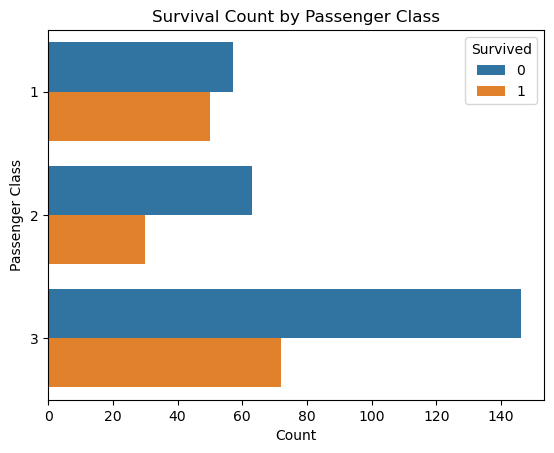

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y='Pclass', hue='Survived', data=df)
plt.ylabel('Passenger Class')
plt.xlabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=100, n_estimators=50)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
getMetric(ytest, ypred)


0.8156424581005587  this is accuracy score
[[90 15]
 [18 56]]  this is confusion matrix
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179
  this is classification report


0

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
rf = RandomForestClassifier(
    n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=3, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb =XGBClassifier(eval_metric='logloss', random_state=42)

# Voting Classifier with weights
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    voting='soft',
    weights=[2, 1, 2]
)

# OR Stacking Classifier (recommended)
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit model (choose voting_clf or stacking_clf)
stacking_clf.fit(xtrain, ytrain)

# Predict and evaluate
ypred = stacking_clf.predict(xtest)

print("Accuracy:", accuracy_score(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[93 12]
 [22 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



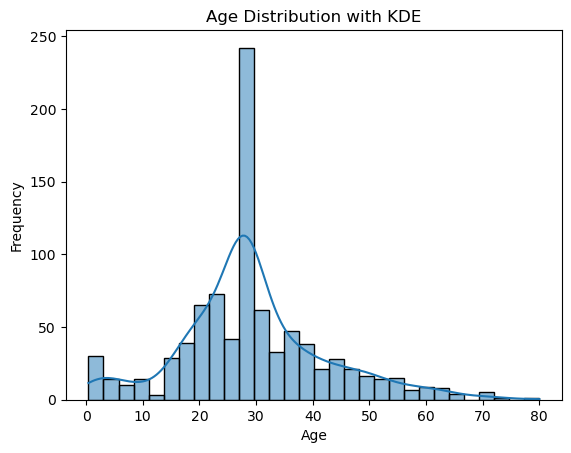

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of Age in Titanic dataset
sns.histplot(dftrain['Age'], kde=True, bins=30)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


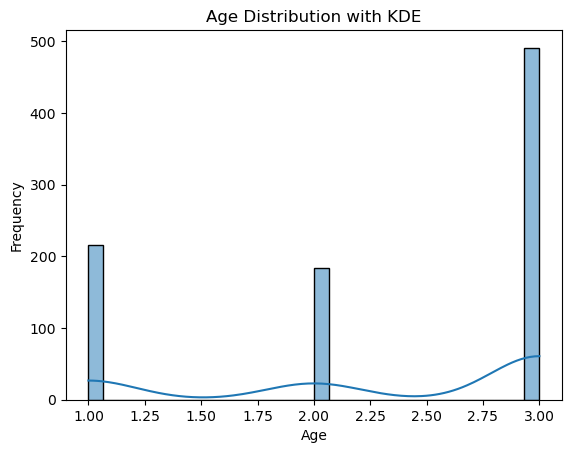

In [21]:
sns.histplot(dftrain['Pclass'], kde=True, bins=30)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
